In [8]:
## Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
import pandas as pd

# Define a custom date parser function
date_parser = lambda x: pd.to_datetime(x, dayfirst=True)

# Load the file
df = pd.read_excel('Sales_Data.xlsx', parse_dates=['ORDERDATE'], date_parser=date_parser)

###Assumptions:

- In the data,  **days Since order** is taken as 2022-06-07 for the difference, we will be removing it & creating new Days difference baseline as 02-06-2020 (1st June 2020)



In [12]:
#Checking samples of the data
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0    2018-02-24                   828   Shipped  Motorcycles    95   
1    2018-05-07                   757   Shipped  Motorcycles    95   
2    2018-07-01                   703   Shipped  Motorcycles    95   
3    2018-08-25                   649   Shipped  Motorcycles    95   
4    2018-10-28                   586   Shipped  Motorcycles    95   
...         ...                   ...       ...          ...   ...   
2742 2019-12-02                  2924   Shipped        Ships    54   
2743 2020-01-31                  2865   Shipped        Ships    54   
2744 2020-03-01                  2836  Resolved        Ships    54   
2745 2020-03-28                  2810   Shipped        Ships    54   
2746 2020-05-06                  2772   On Hold        Ships    54   

     PRODUCTCODE             CUSTOMERNAME             PHONE  \
0       S10_1678        Land of Toys Inc.        2125557818   
1       S10_1678       Reims Collectables        26.47.1555   
2       S10_1678          Lyon Souveniers  +33 1 46 62 7555   
3       S10_1678        Toys4GrownUps.com        6265557265   
4       S10_1678     Technics Stores Inc.        6505556809   
...          ...                      ...               ...   
2742    S72_3212    Euro Shopping Channel    (91) 555 94 44   
2743    S72_3212  Oulu Toy Supplies, Inc.        981-443655   
2744    S72_3212    Euro Shopping Channel    (91) 555 94 44   
2745    S72_3212             Alpha Cognac        61.77.6555   
2746    S72_3212        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0                 Yu             Kwai    Small  
1            Henriot             Paul    Small  
2           Da Cunha           Daniel   Medium  
3              Young            Julie   Medium  
4             Hirano             Juri   Medium  
...              ...              ...      ...  
2742          Freyre            Diego    Small  
2743       Koskitalo           Pirkko   Medium  
2744          Freyre            Diego   Medium  
2745          Roulet          Annette    Small  
2746         Yoshido             Juri   Medium  

[2747 rows x 20 columns]

In [13]:
#Since it shows 2 NaN after 2747, we will consider data before that only
df = df.iloc[:2747]

In [14]:
#Dimentions of the data
df.shape

(2747, 20)

#### Let's drop days since last order & create a new feature having time difference as : DateLast order - 06-01-2020


In [15]:
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
from datetime import datetime

temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days

In [16]:
#Checking first & last 5 samples of the data
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0    2018-02-24   Shipped  Motorcycles    95    S10_1678   
1    2018-05-07   Shipped  Motorcycles    95    S10_1678   
2    2018-07-01   Shipped  Motorcycles    95    S10_1678   
3    2018-08-25   Shipped  Motorcycles    95    S10_1678   
4    2018-10-28   Shipped  Motorcycles    95    S10_1678   
...         ...       ...          ...   ...         ...   
2742 2019-12-02   Shipped        Ships    54    S72_3212   
2743 2020-01-31   Shipped        Ships    54    S72_3212   
2744 2020-03-01  Resolved        Ships    54    S72_3212   
2745 2020-03-28   Shipped        Ships    54    S72_3212   
2746 2020-05-06   On Hold        Ships    54    S72_3212   

                 CUSTOMERNAME             PHONE  \
0           Land of Toys Inc.        2125557818   
1          Reims Collectables        26.47.1555   
2             Lyon Souveniers  +33 1 46 62 7555   
3           Toys4GrownUps.com        6265557265   
4        Technics Stores Inc.        6505556809   
...                       ...               ...   
2742    Euro Shopping Channel    (91) 555 94 44   
2743  Oulu Toy Supplies, Inc.        981-443655   
2744    Euro Shopping Channel    (91) 555 94 44   
2745             Alpha Cognac        61.77.6555   
2746        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  DAYS_SINCE_LASTORDER  
0                 Yu             Kwai    Small                   828  
1            Henriot             Paul    Small                   756  
2           Da Cunha           Daniel   Medium                   701  
3              Young            Julie   Medium                   646  
4             Hirano             Juri   Medium                   582  
...              ...              ...      ...                   ...  
2742          Freyre            Diego    Small                   182  
2743       Koskitalo           Pirkko   Medium                   122  
2744          Freyre            Diego   Medium                    92  
2745          Roulet          Annette    Small                    65  
2746         Yoshido             Juri   Medium                    26  

[2747 rows x 20 columns]

In [17]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

**Insights**
- The dataset contains 2747 entries with 20 columns.
- All columns have 2747 non-null values, hence no missing found
- Key columns include sales transaction details, customer information, product details, order status, and recency information.
- Data types vary across columns, including floats, datetime, and objects.

#### Numerical features
Since ORDERNUMBER is not relevant for the EDA here, we will drop for Exploratory data analysis & visualizations

In [18]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


### Categorical Features
- We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'

In [19]:
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))


Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


In [20]:
## Descriptive Summary of the dataset - Numeric features

display(round(df_num.describe(),2).T)

count     mean      std     min      25%      50%  \
QUANTITYORDERED       2747.0    35.10     9.76    6.00    27.00    35.00   
PRICEEACH             2747.0   101.10    42.04   26.88    68.74    95.55   
ORDERLINENUMBER       2747.0     6.49     4.23    1.00     3.00     6.00   
SALES                 2747.0  3553.05  1838.95  482.13  2204.35  3184.80   
MSRP                  2747.0   100.69    40.11   33.00    68.00    99.00   
DAYS_SINCE_LASTORDER  2747.0   384.09   230.23    1.00   197.00   343.00   

                          75%       max  
QUANTITYORDERED         43.00     97.00  
PRICEEACH              127.10    252.87  
ORDERLINENUMBER          9.00     18.00  
SALES                 4503.09  14082.80  
MSRP                   124.00    214.00  
DAYS_SINCE_LASTORDER   571.00    877.00

In [21]:
## Descriptive Summary of the dataset - Categorical features

df.select_dtypes(include = ['object']).describe().T

count unique                    top  freq
STATUS            2747      6                Shipped  2541
PRODUCTLINE       2747      7           Classic Cars   949
PRODUCTCODE       2747    109               S18_3232    51
CUSTOMERNAME      2747     89  Euro Shopping Channel   259
PHONE             2747     88         (91) 555 94 44   259
ADDRESSLINE1      2747     89     C/ Moralzarzal, 86   259
CITY              2747     71                 Madrid   304
POSTALCODE        2747     73                  28034   259
COUNTRY           2747     19                    USA   928
CONTACTLASTNAME   2747     76                 Freyre   259
CONTACTFIRSTNAME  2747     72                  Diego   259
DEALSIZE          2747      3                 Medium  1349

**Insights**

1. **Sales Amount**: The average sales amount per transaction is approximately '3,553'. Customers make purchases ranging from '482.13' to '14,082.80.'

2. **Quantity Ordered**: On average, customers order approximately 35 items per transaction, with a minimum of 6 and a maximum of 97 items.

3. **Price Each**: The average price of each item in an order is approximately 101. Prices vary between a minimum of 26.88 and a maximum of 252.87.

4. **Manufacturer's Suggested Retail Price (MSRP)**: The average MSRP is approximately 00.69, with prices ranging from 33 to 214.


5. **Order Status**: The most common order status is "Shipped," occurring 2541 times.

6. **Product Line**: "Classic Cars" is the dominant product line with 949 entries.

7. **Customer Concentration**: "Euro Shopping Channel" is the top customer, with 259 transactions.

8. **Geographic Trends**: "Madrid" and "USA" are the most frequent city and country, respectively.

9. **Deal Sizes**: The majority of deals fall into the "Medium" category, accounting for 1349 cases.

- Exploratory Data Analysis

In [22]:
#Missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

- No missing values found

In [23]:
#Checking duplicate values
df.duplicated().sum()

0

- No Duplicate values found

## Univariate Analysis

In [26]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot histogram
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)

    # Plot violin plot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )

    plt.show()

Description of QUANTITYORDERED
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 

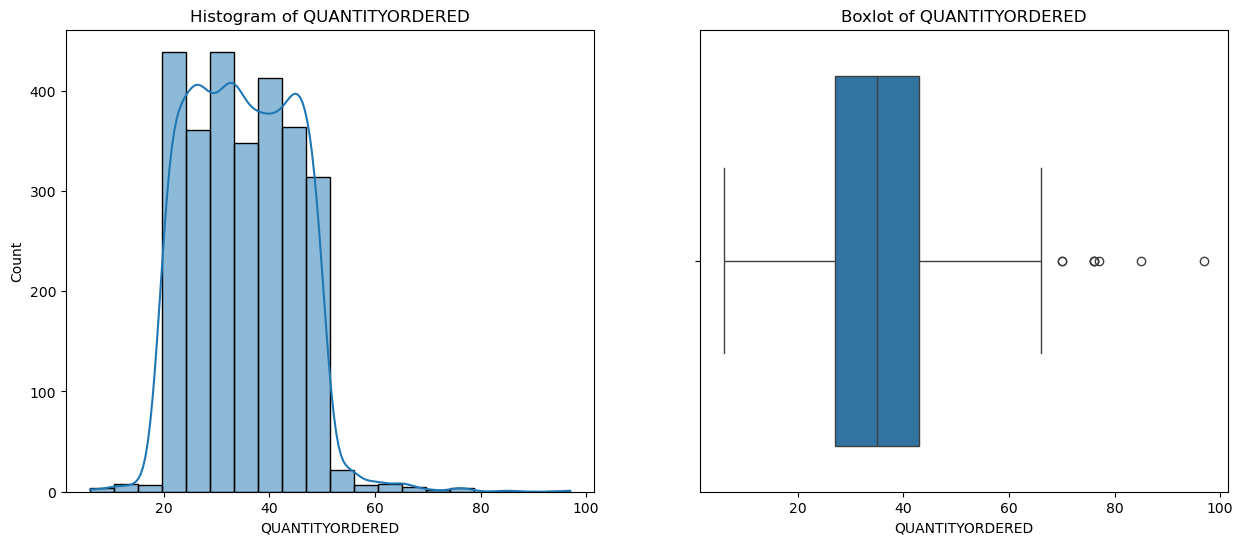

Description of PRICEEACH
count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 

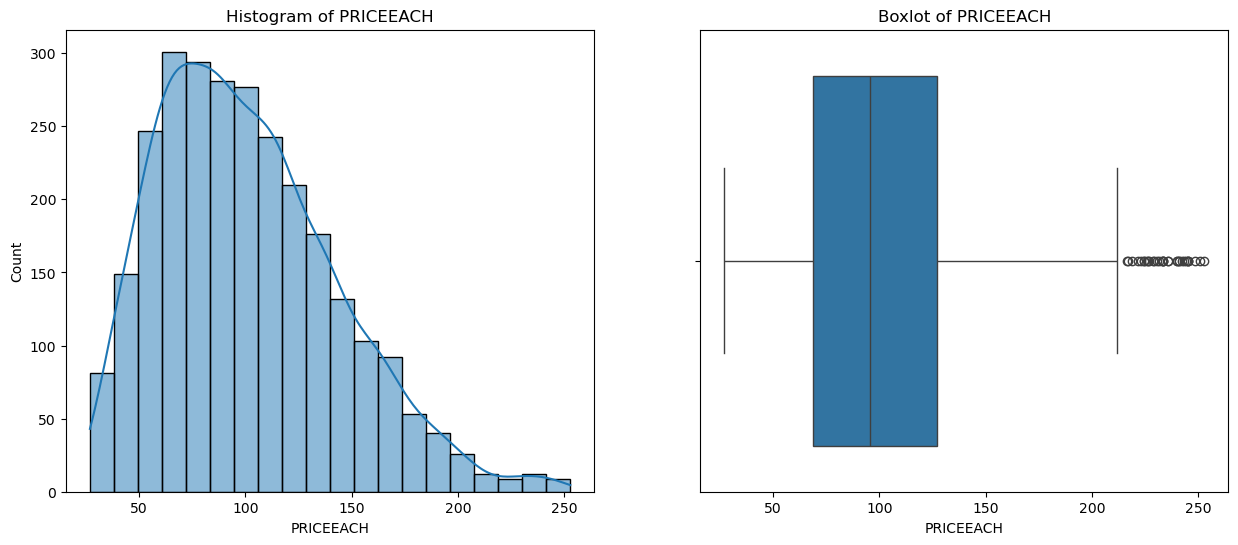

Description of ORDERLINENUMBER
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 

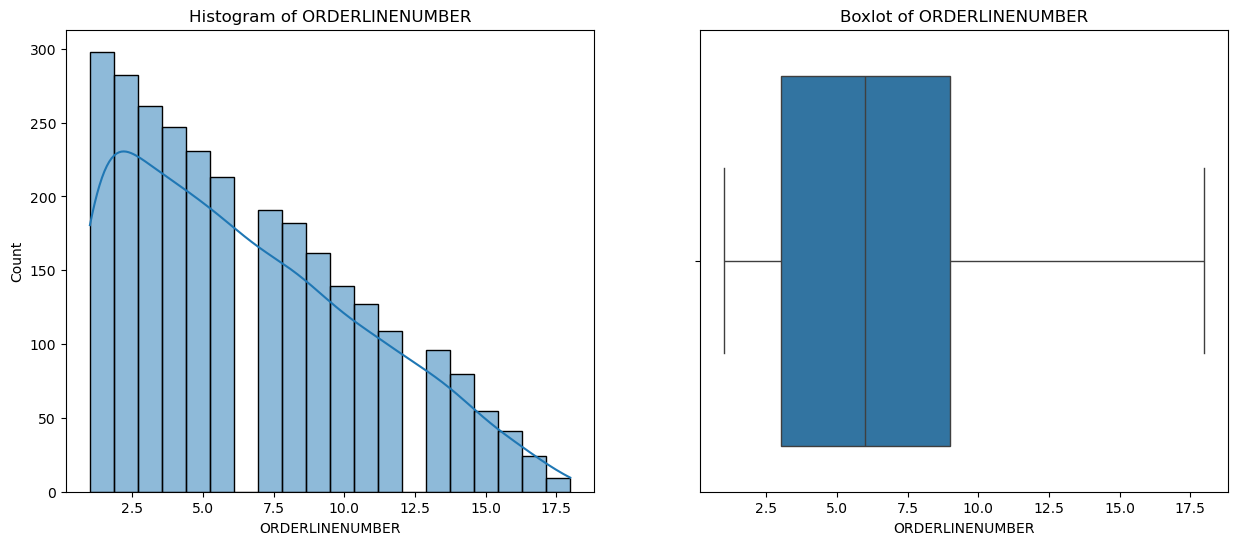

Description of SALES
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 

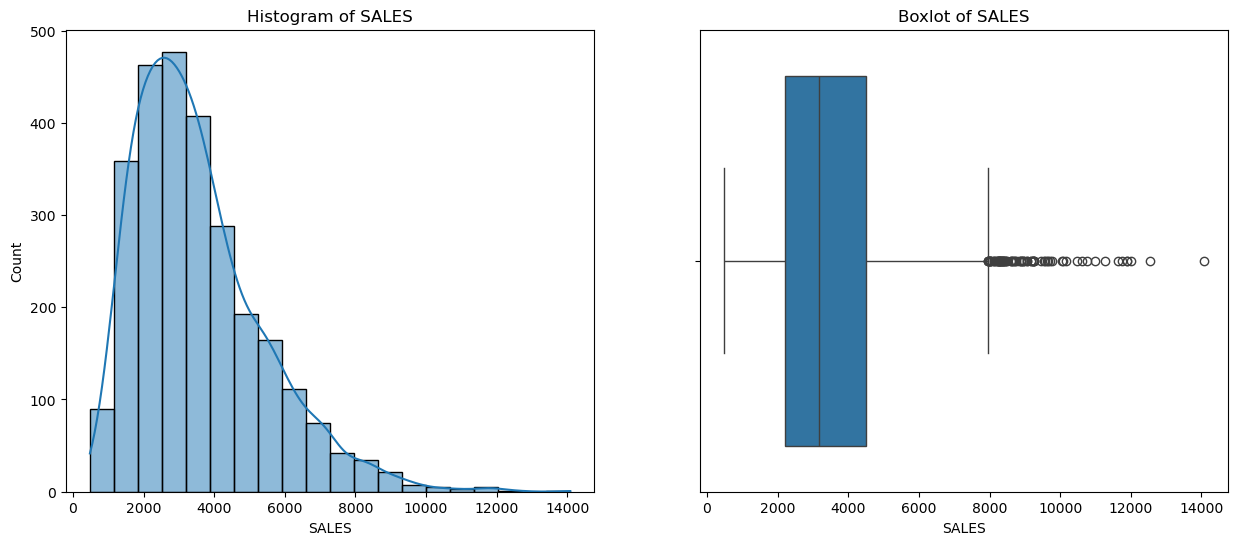

Description of MSRP
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 

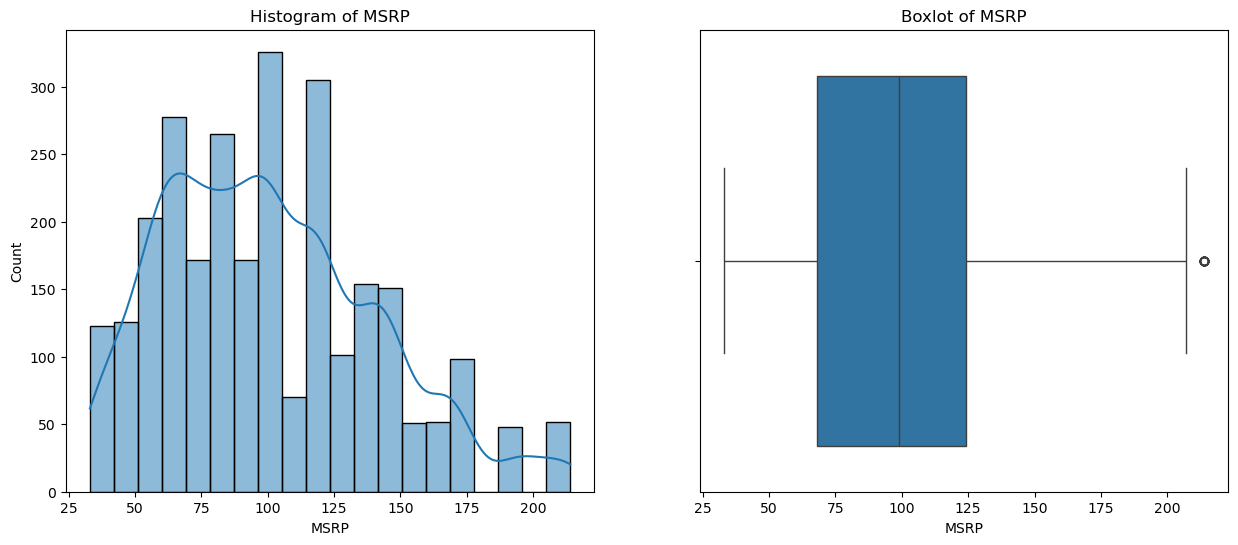

Description of DAYS_SINCE_LASTORDER
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 

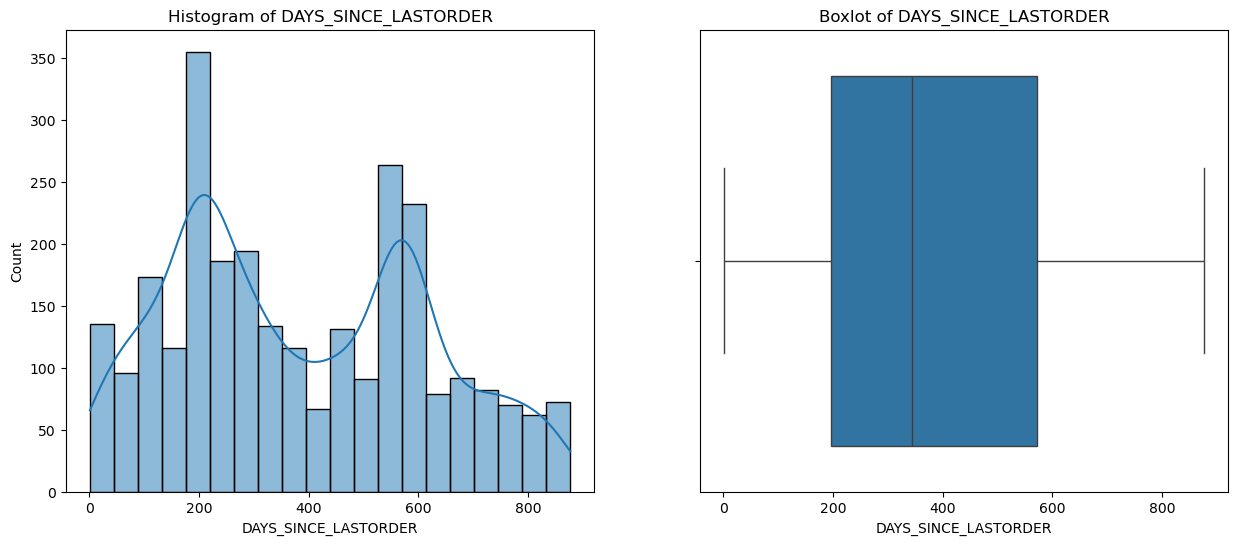

In [27]:
for x in df_num:
    univariateAnalysis_numeric(x,20)

In [28]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


- Plotting the count & % of each Categorical feature to understand distribution

In [30]:
import squarify
# Defining function to plot bar & Treemap
def univariateAnalysis_category(cat_column):
    print("" + cat_column)
    value_counts = df_cat[cat_column].value_counts() #
    num_categories = len(value_counts)
    figsize = (num_categories * 1.5, 4)
    total_width = 12
    # Bar chart
    plt.figure(figsize=figsize)
    ax = value_counts.plot.bar(title="Barplot of " + cat_column)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
    print("       ")
    # Treemap
    plt.figure(figsize=(total_width, 8))
    percentages = (value_counts / len(df_cat)) * 100
    labels = [f"{label}\n{percent:.1f}%" for label, percent in zip(value_counts.index, percentages)]
    color_scale = sns.color_palette("RdYlGn", as_cmap=True)
    color_values = color_scale(value_counts.values / value_counts.values.max())  # Adjust color intensity
    squarify.plot(sizes=value_counts, label=labels, alpha=0.7, color=color_values,
                  text_kwargs={'fontsize': 8, 'fontweight': 'normal', 'wrap': True})
    plt.title("Treemap of " + cat_column)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("       ")

STATUS


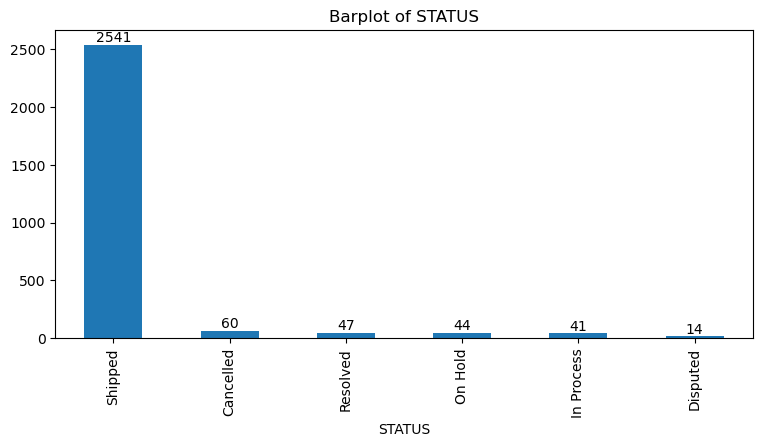

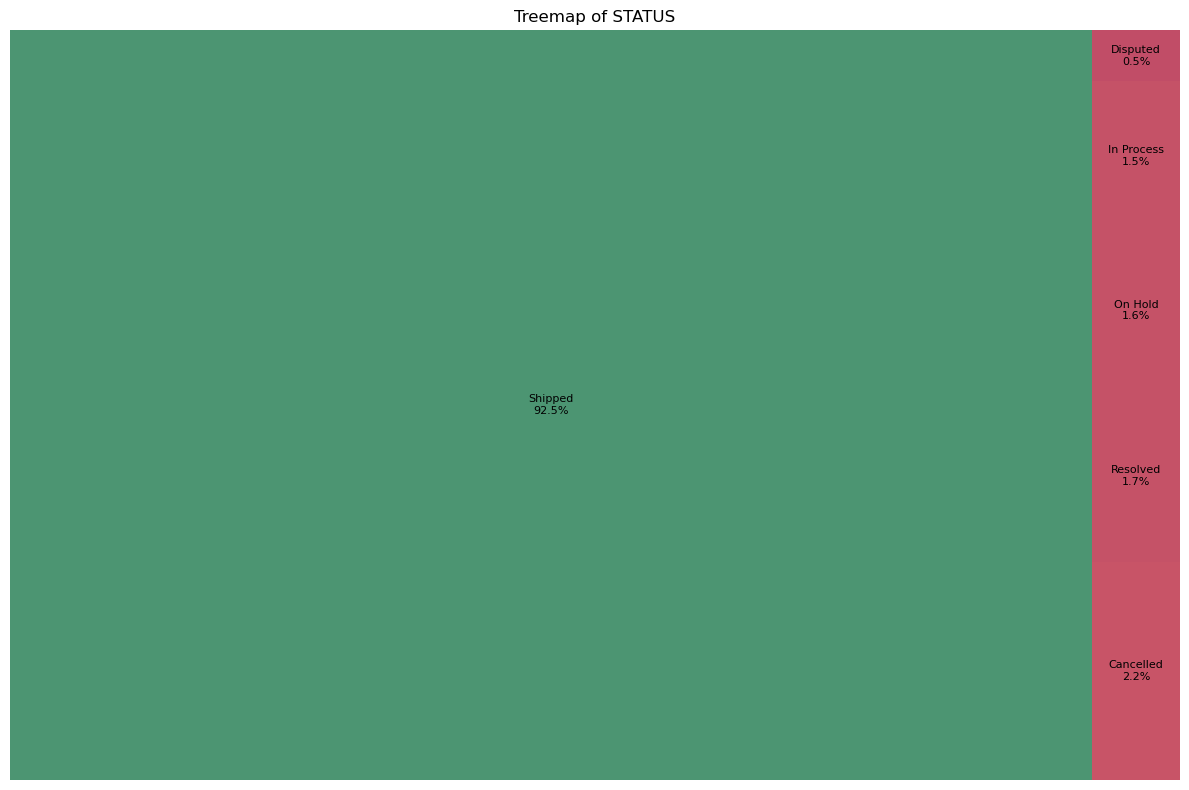

       
PRODUCTLINE


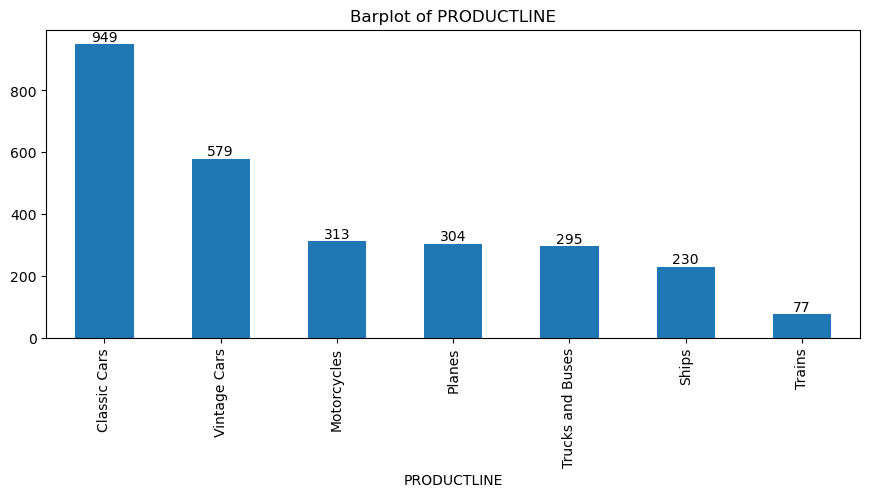

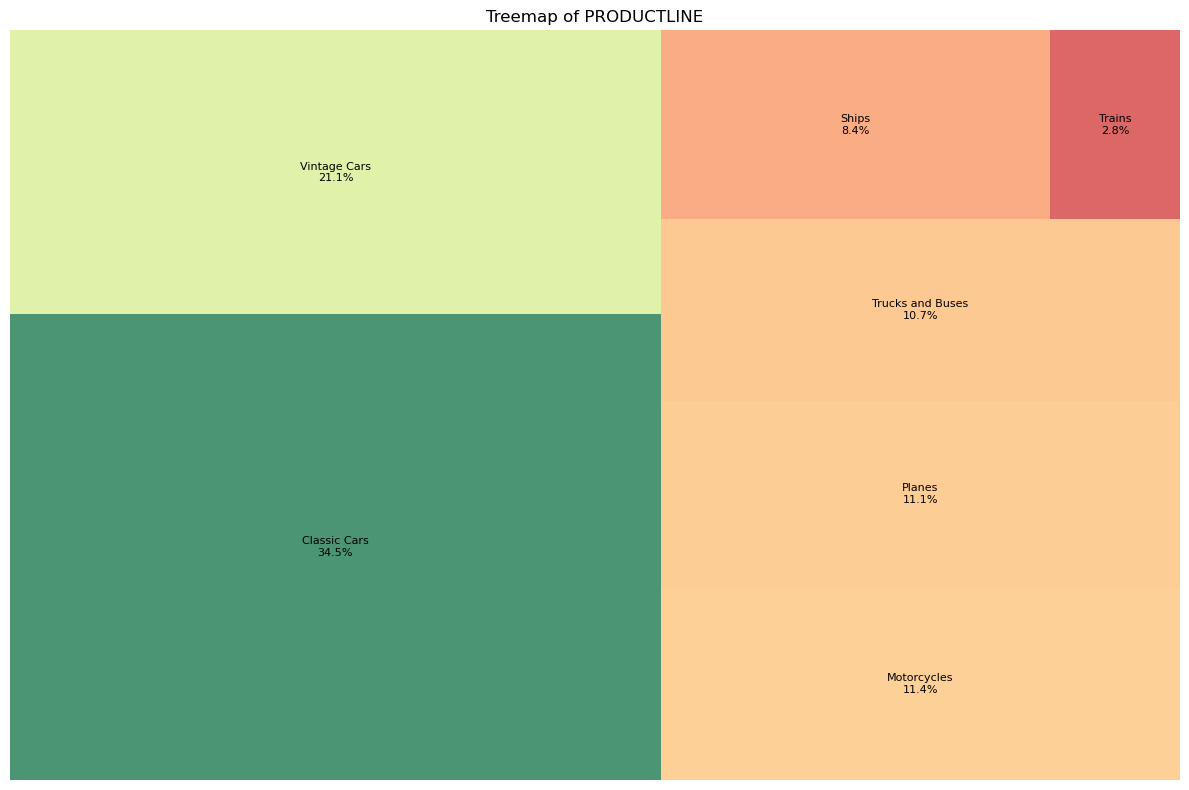

       
PRODUCTCODE


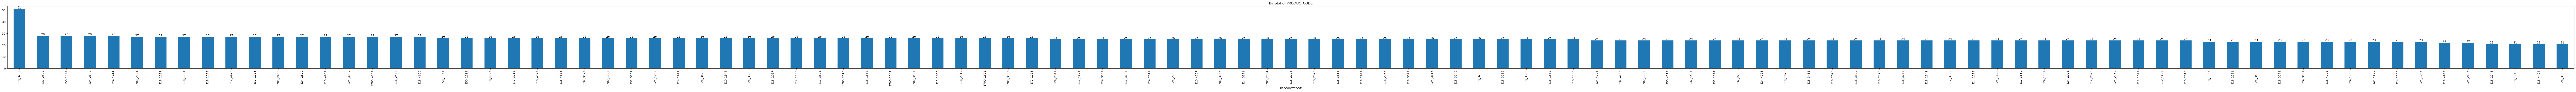

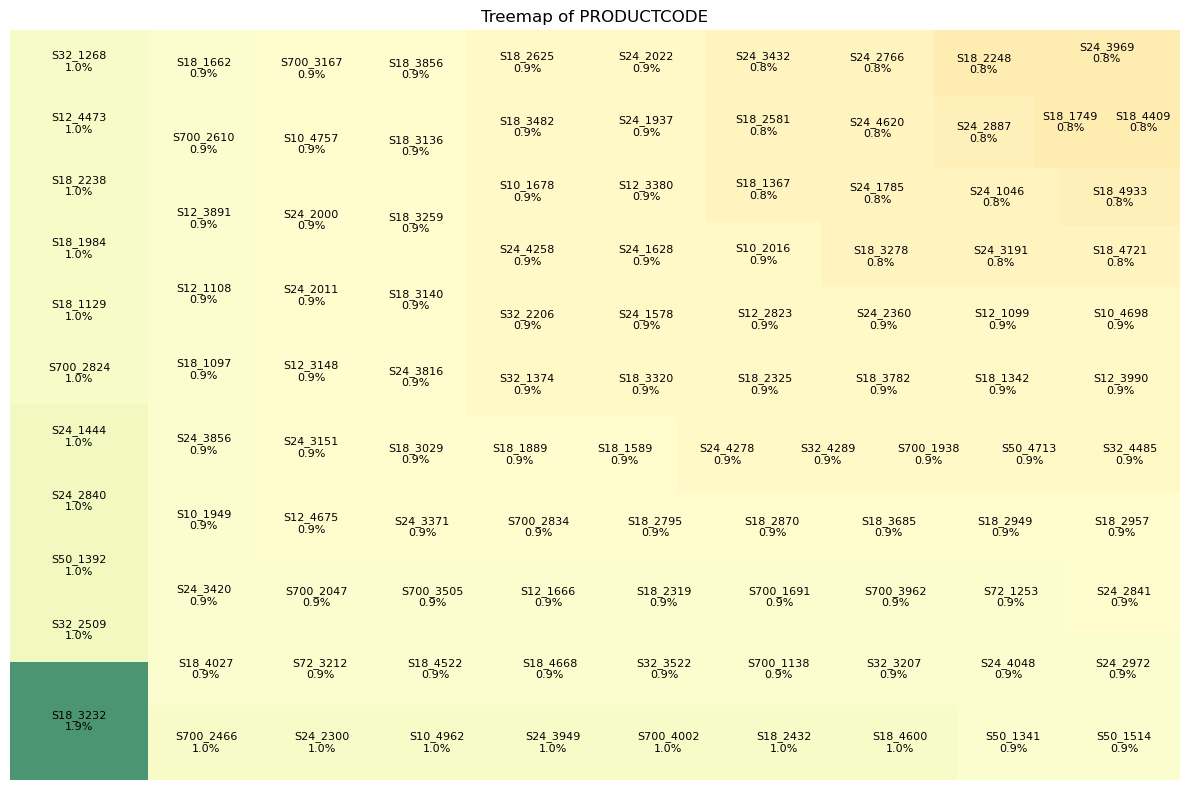

       
CUSTOMERNAME


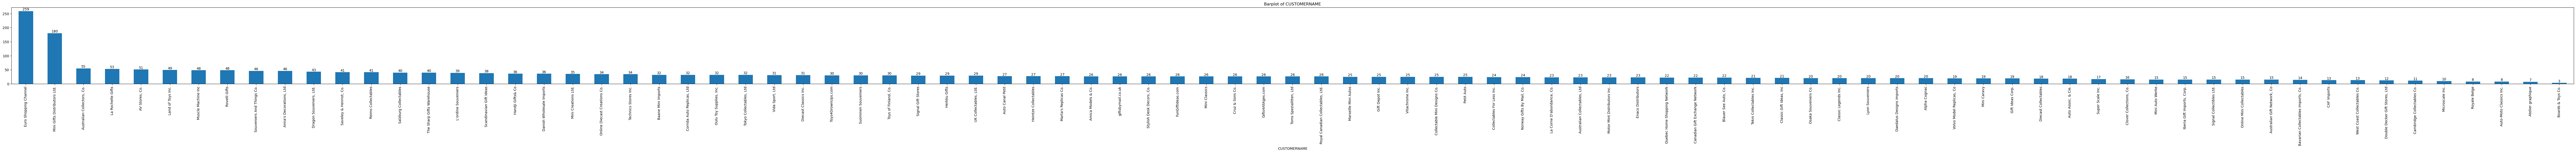

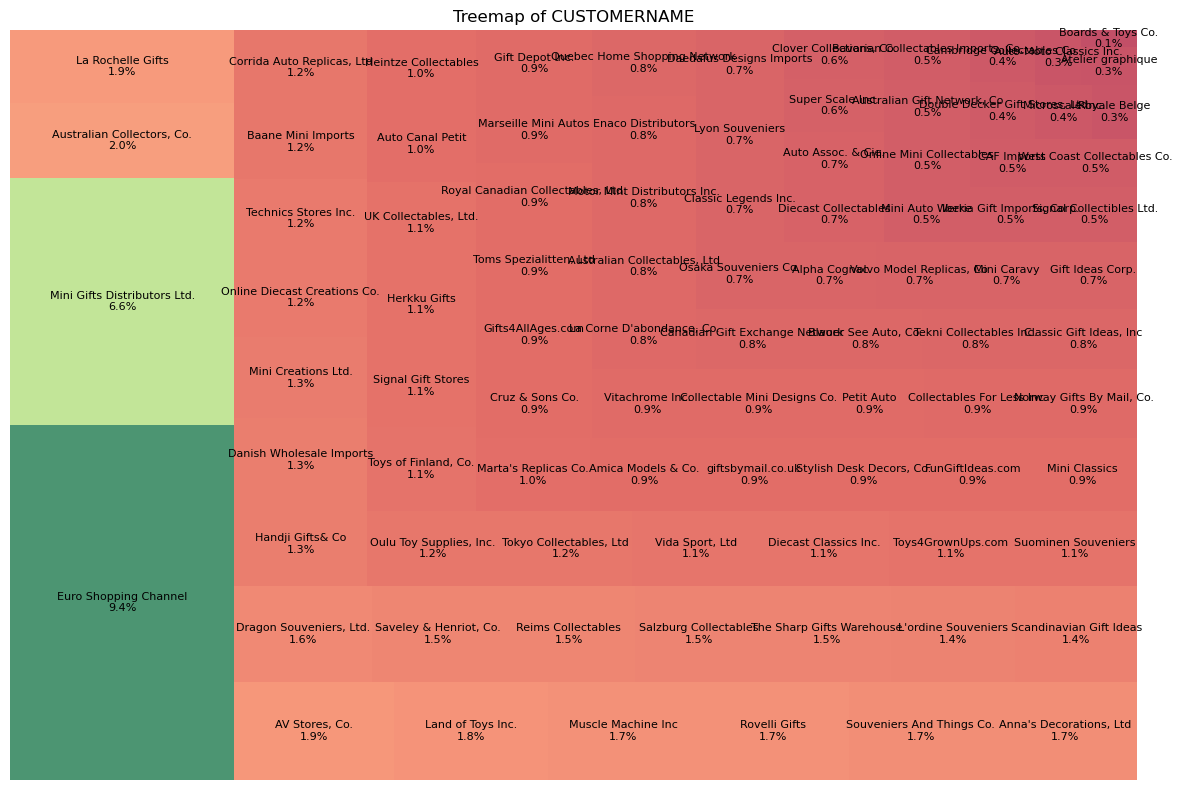

       
CITY


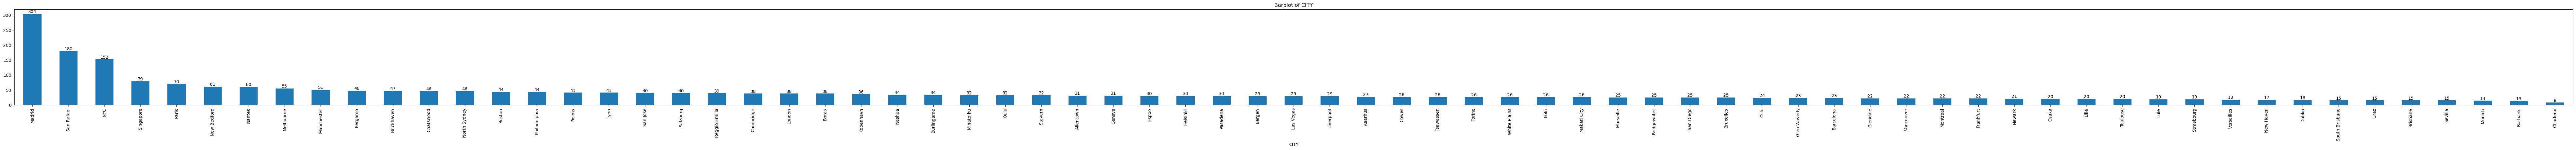

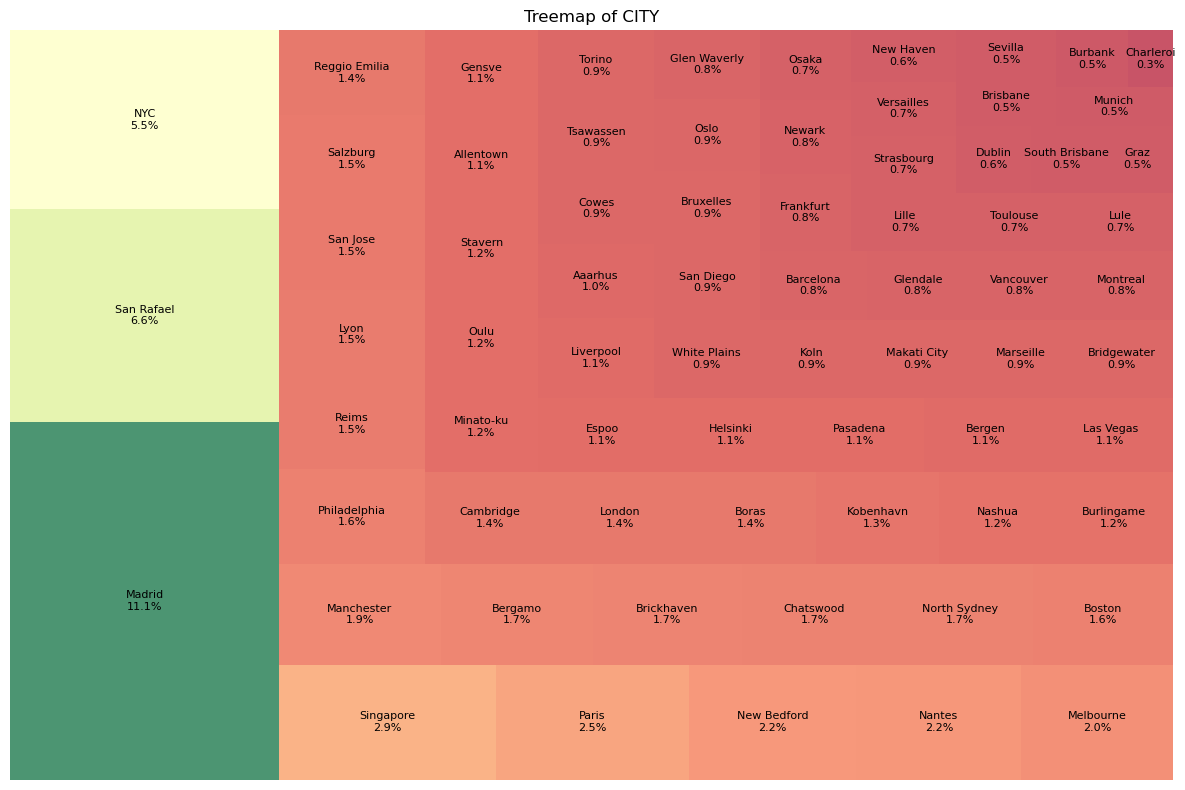

       
POSTALCODE


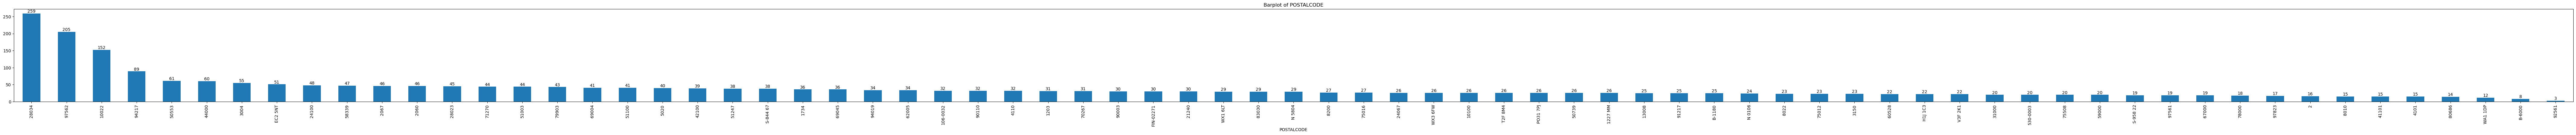

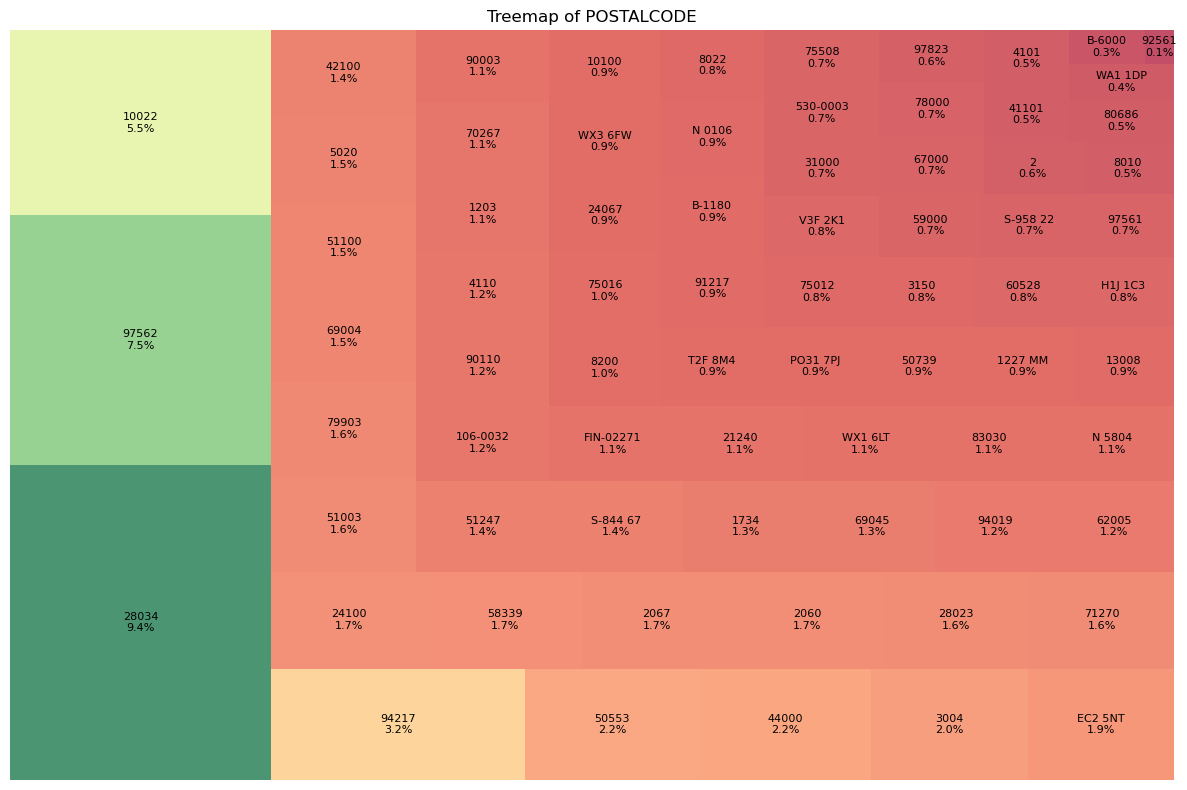

       
COUNTRY


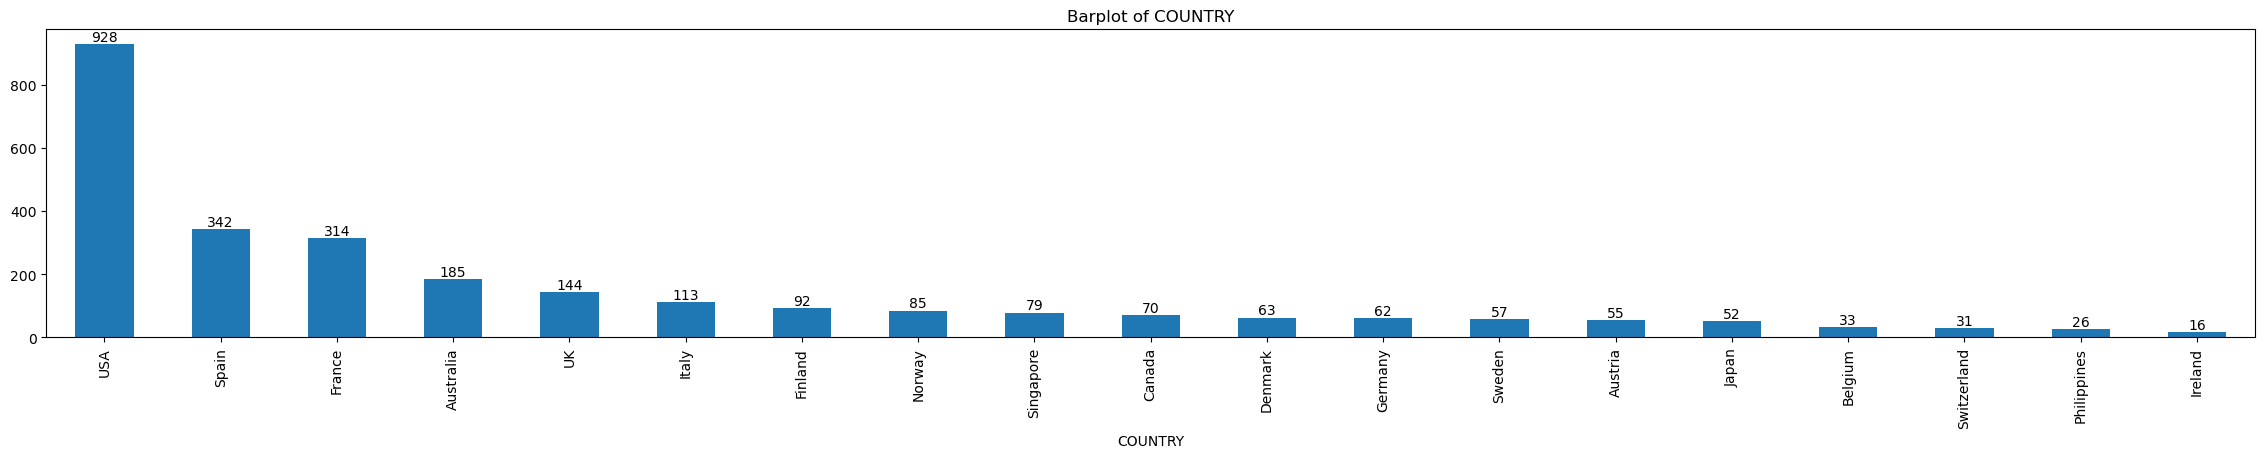

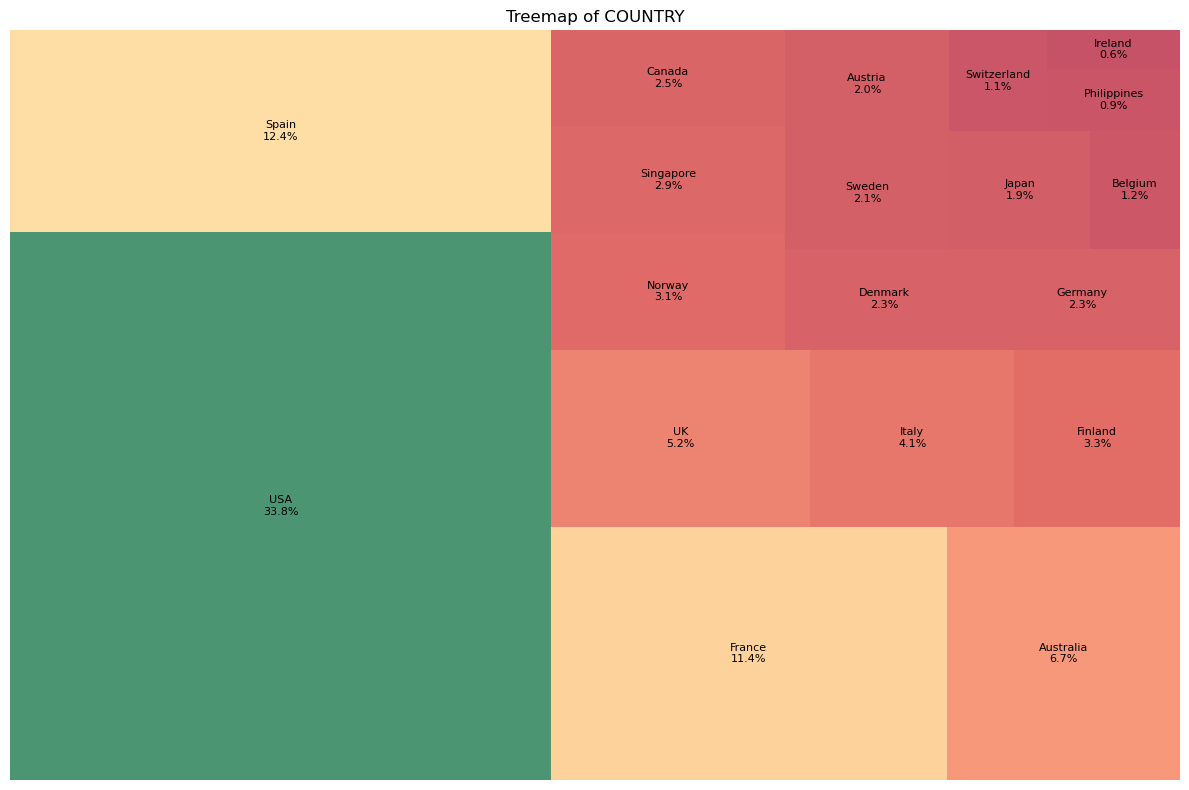

       
DEALSIZE


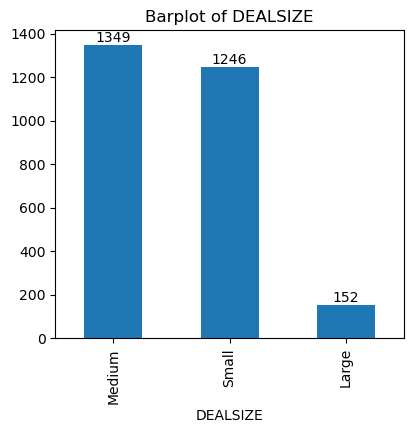

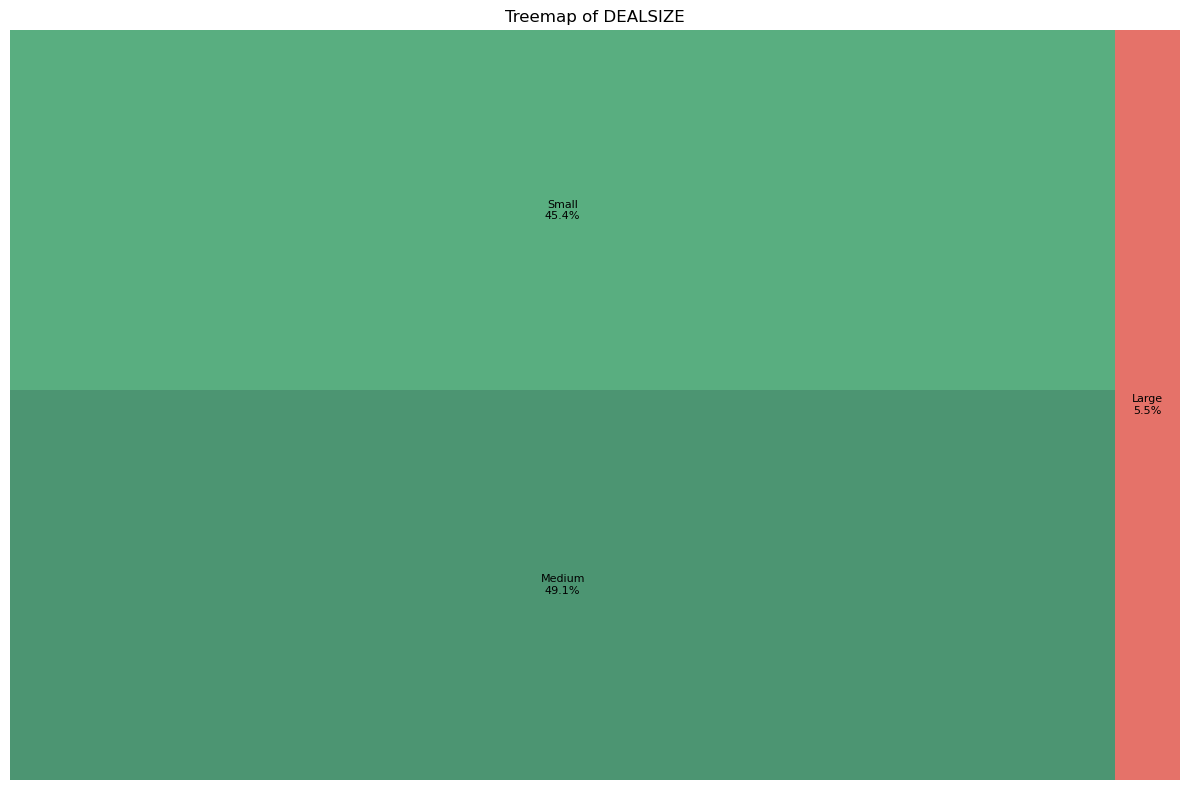

In [31]:
#Show the plots
for x in df_cat:
    univariateAnalysis_category(x)

#### Outliers

<Figure size 1000x600 with 0 Axes>

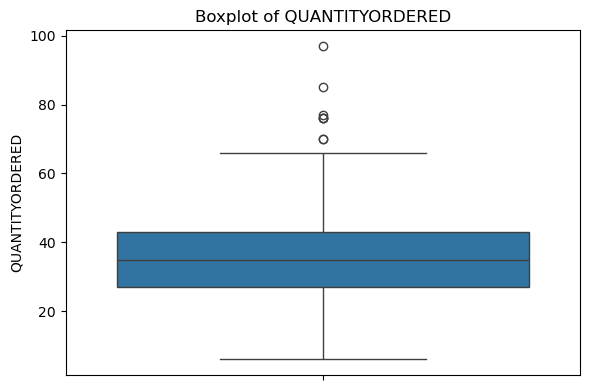

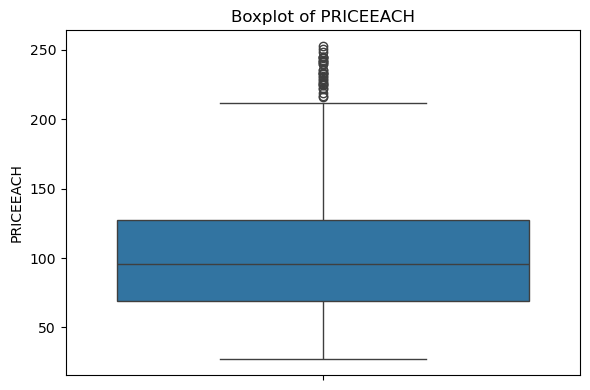

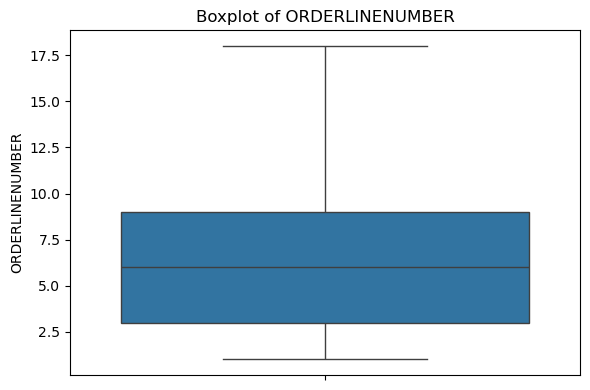

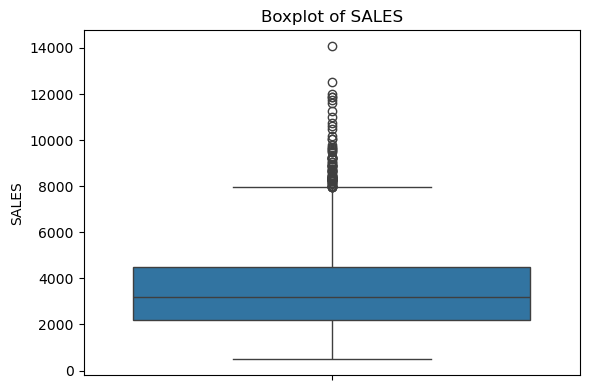

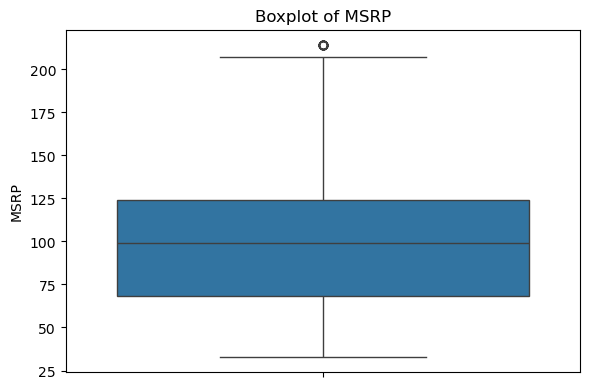

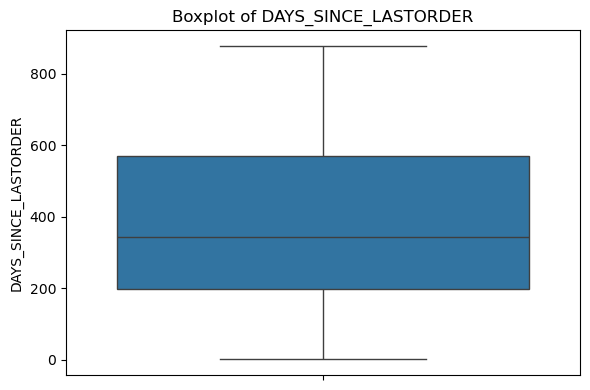

In [34]:
plt.figure(figsize=(10, 6))
feature_list = df_num.columns
for i, feature in enumerate(feature_list):
    plt.figure(figsize=(6, 4))
    # Create a boxplot
    sns.boxplot(y=df_num[feature], data=df_num)
    data = df_num[feature]
    q1, median, q3 = np.percentile(data, [25, 50, 75])

    plt.title('Boxplot of {}'.format(feature))
    plt.tight_layout()
plt.show();

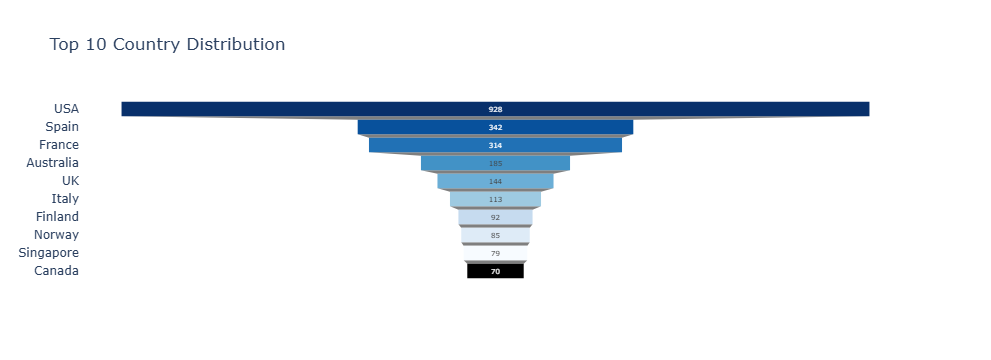

In [35]:
import plotly.graph_objects as go
import plotly.express as px

country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

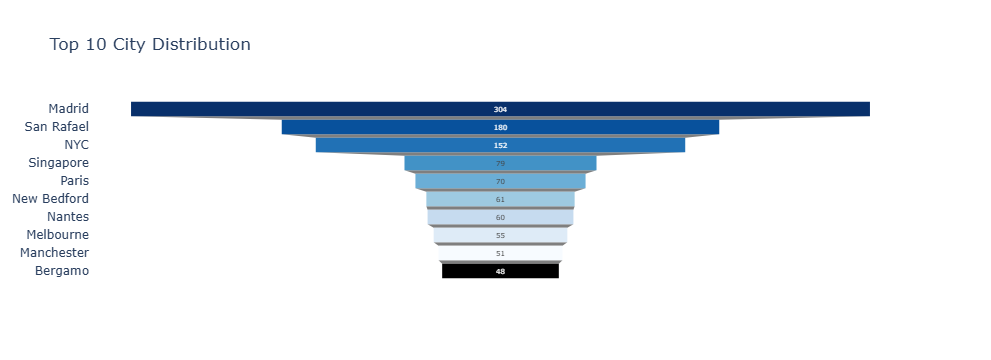

In [36]:
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))

fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

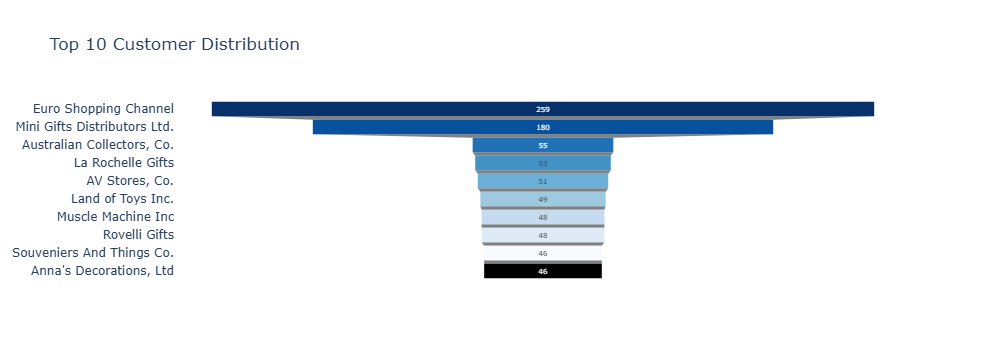

In [37]:
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

## Bivariate Analysis

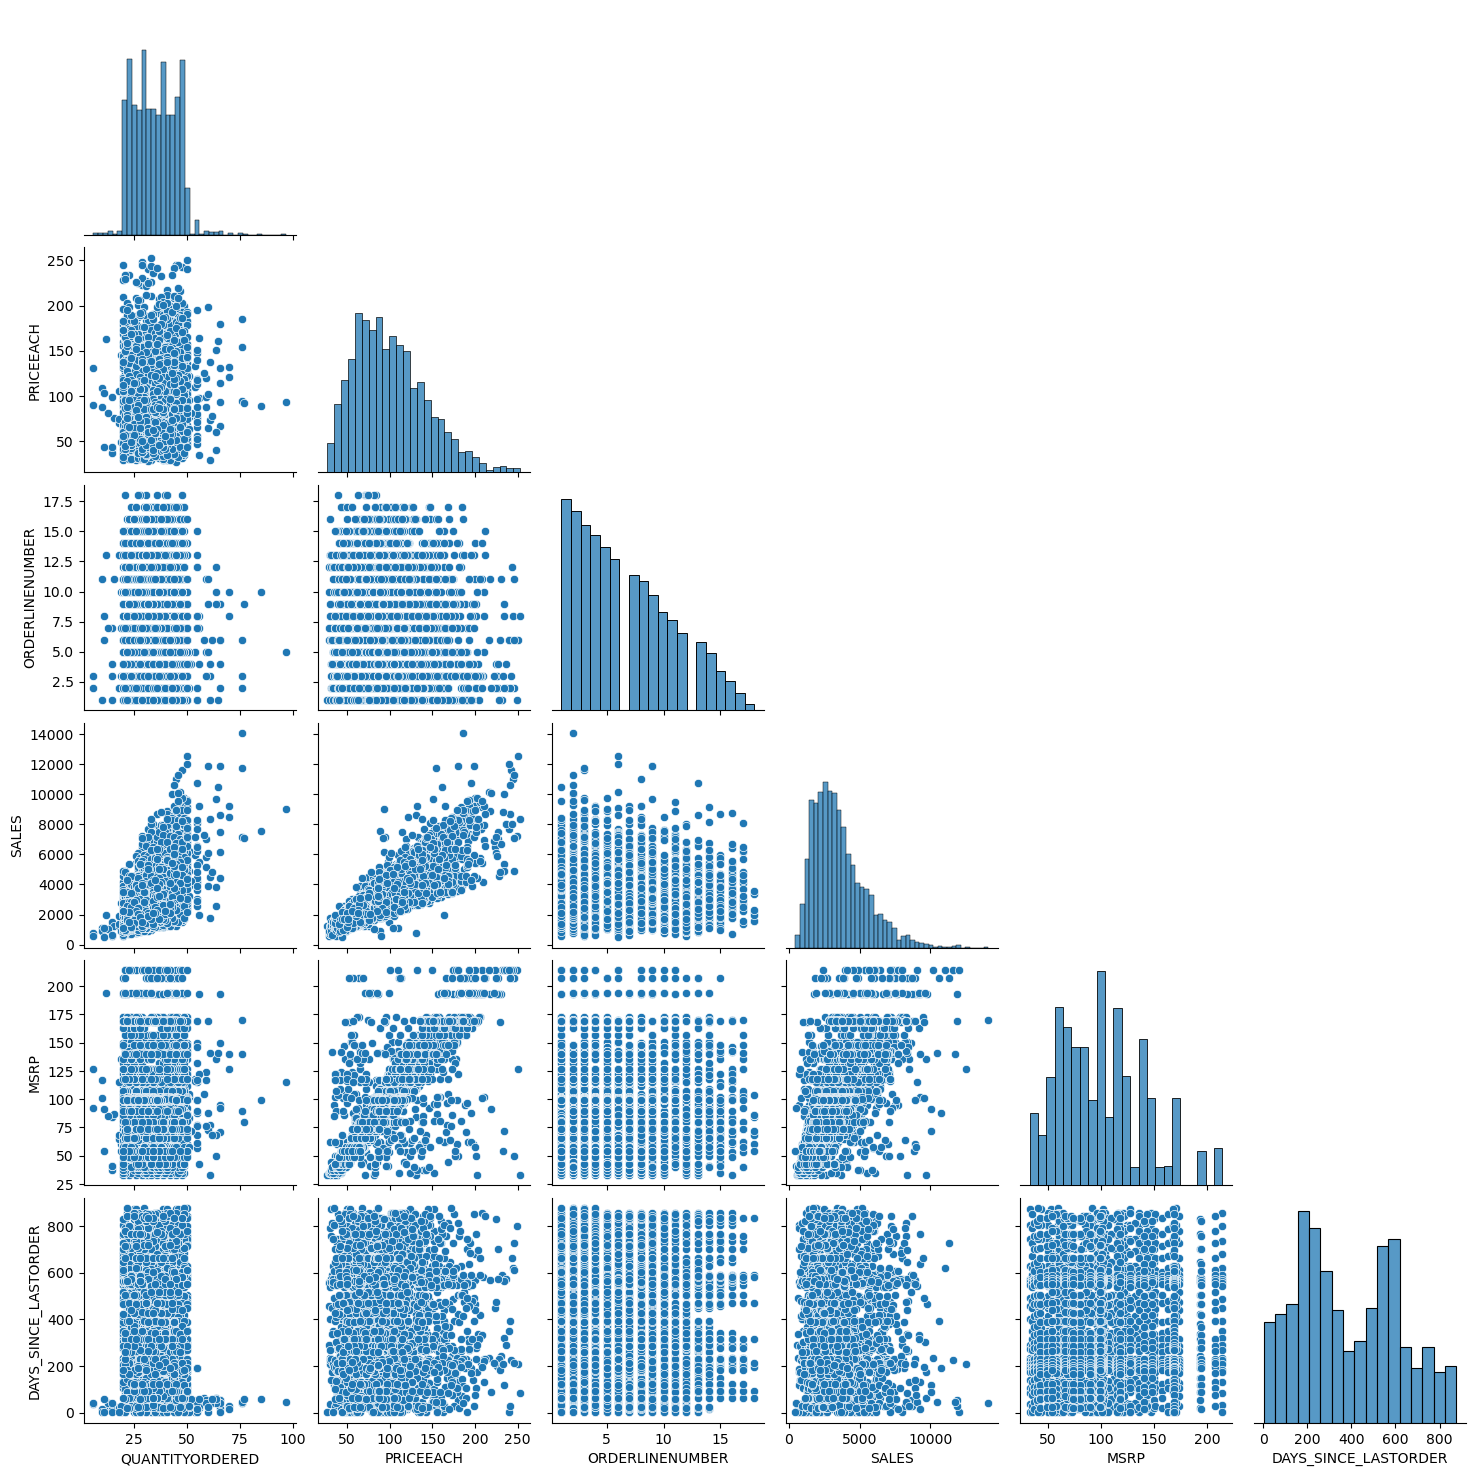

In [38]:
sns.pairplot(data=df_num, corner = True );

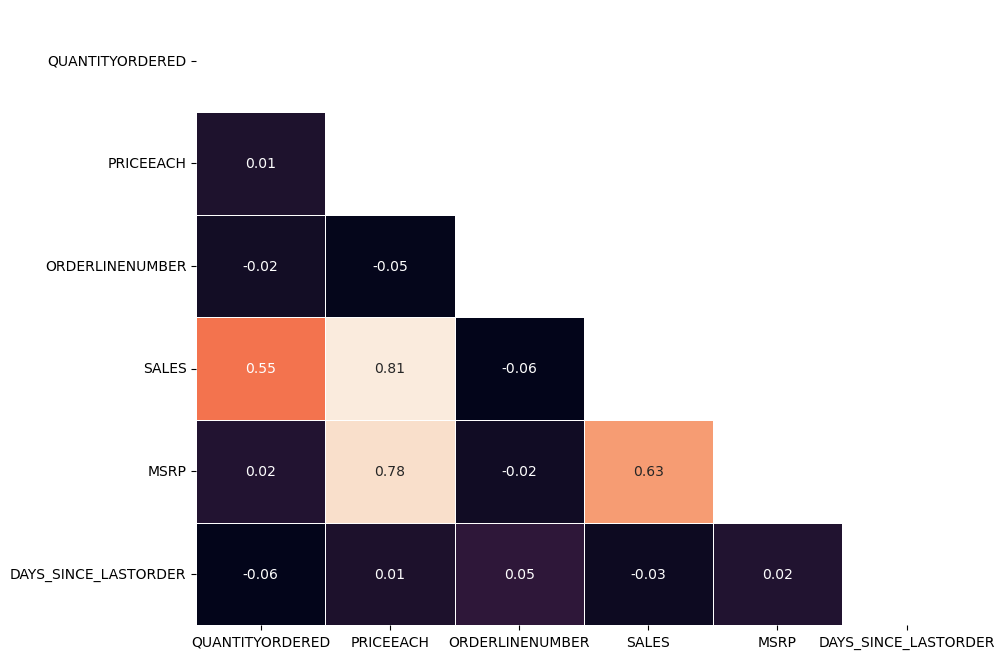

In [40]:
corr = df_num.corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool))  # Use the built-in bool type
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cbar=None, linewidth=0.5, ax=ax)
plt.show()

**Insights**

1. **Quantity Ordered and Sales**: When customers order more items ('QUANTITYORDERED'), it's often associated with higher sales ('SALES'). So, the more customers buy, the more the company earns in sales.

2. **Price and Sales**: There's a strong connection between the price of each item ('PRICEEACH') and the total sales ('SALES'). When items are priced higher, the company tends to make more in sales. So, pricing plays a significant role in revenue.

3. **MSRP and Price**: The price at which items are sold ('PRICEEACH') is closely related to the manufacturer's suggested retail price ('MSRP'). In most cases, the selling price is quite similar to what the manufacturer recommends.

4. **Days Since Last Order**: The time elapsed since a customer's last order ('DAYS_SINCE_LASTORDER') has a weak connection with the quantity of items ordered. Customers who order more frequently may tend to buy smaller quantities, but this relationship isn't very strong.

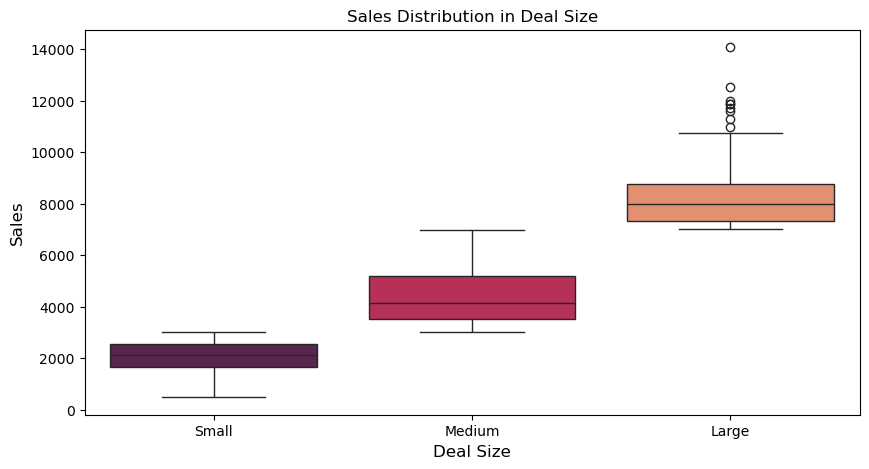

In [41]:
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

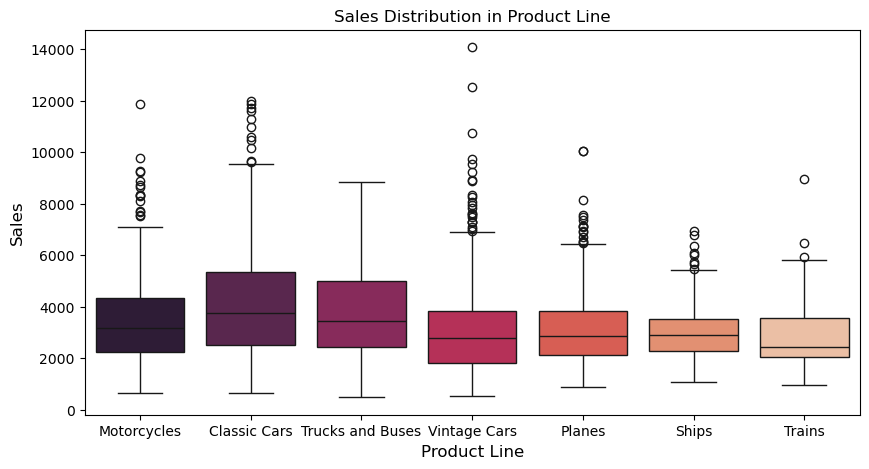

In [42]:
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

#### Yearly, Quarterly, Monthly, weekly Sales Trend

In [44]:
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

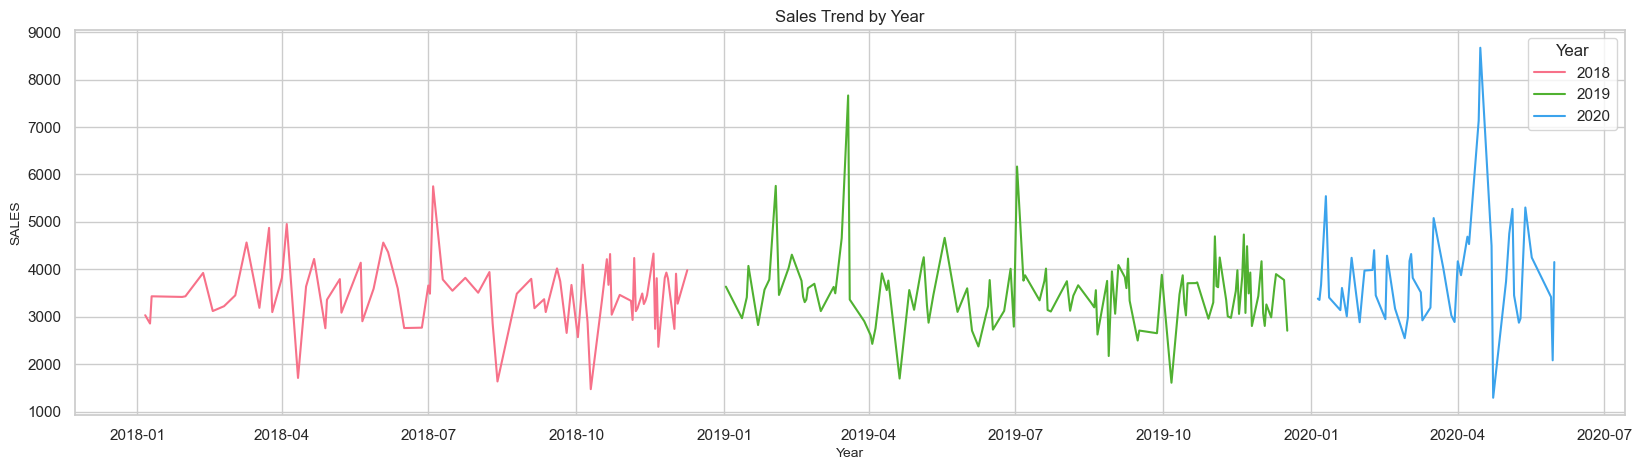

In [45]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

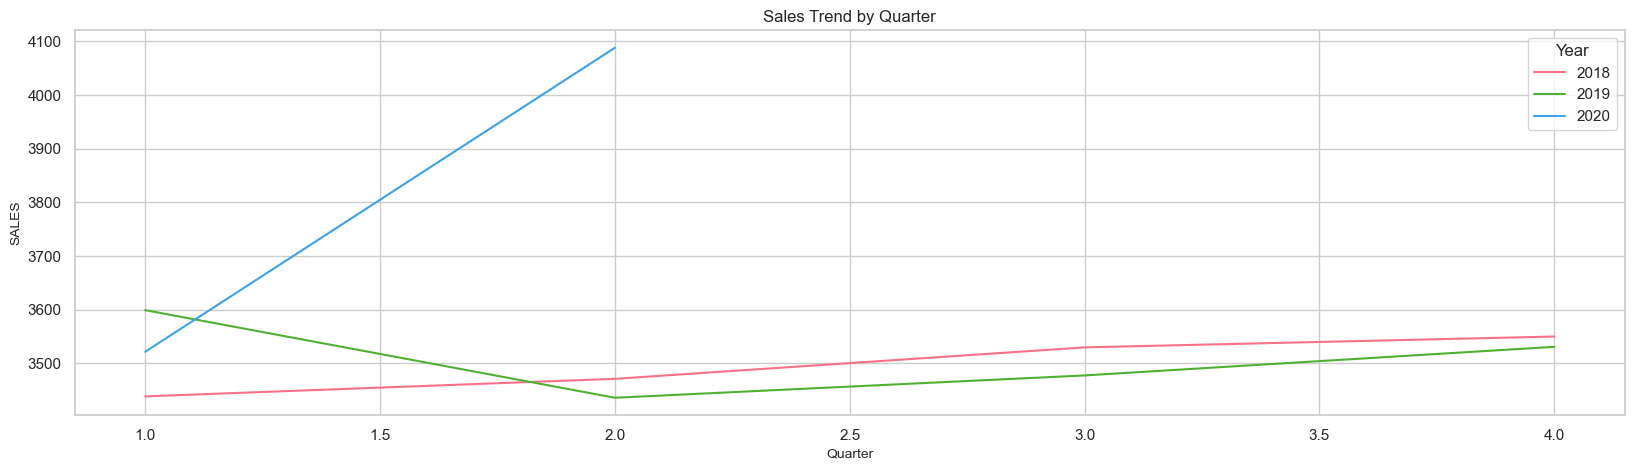

In [46]:
# Sales trend by Quarter
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

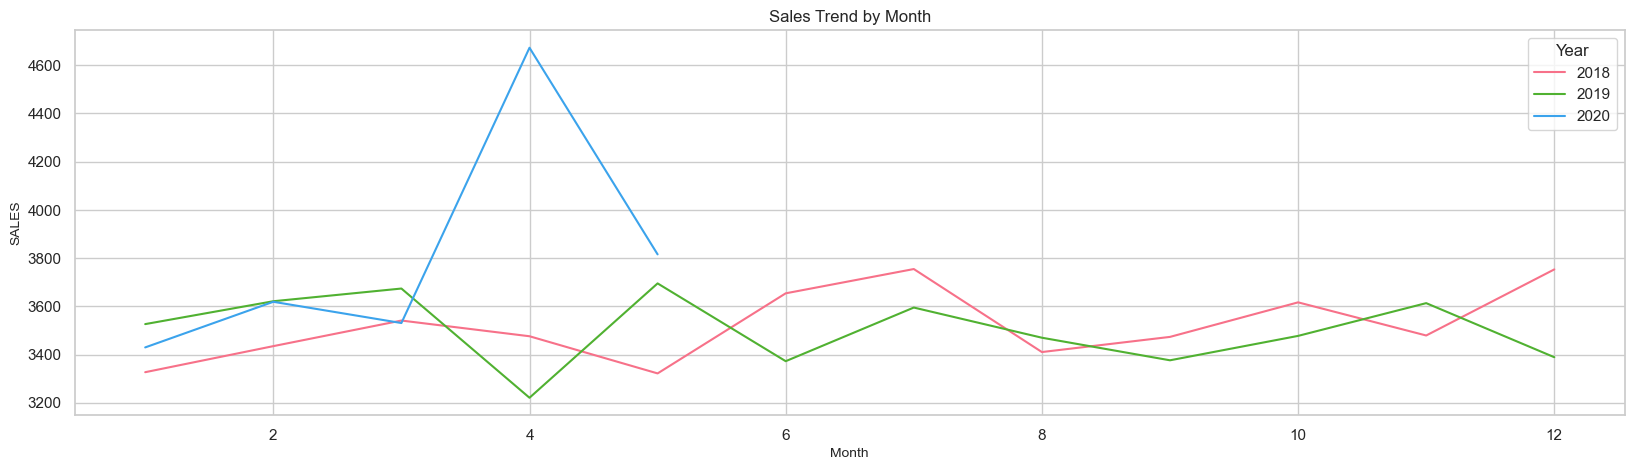

In [47]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

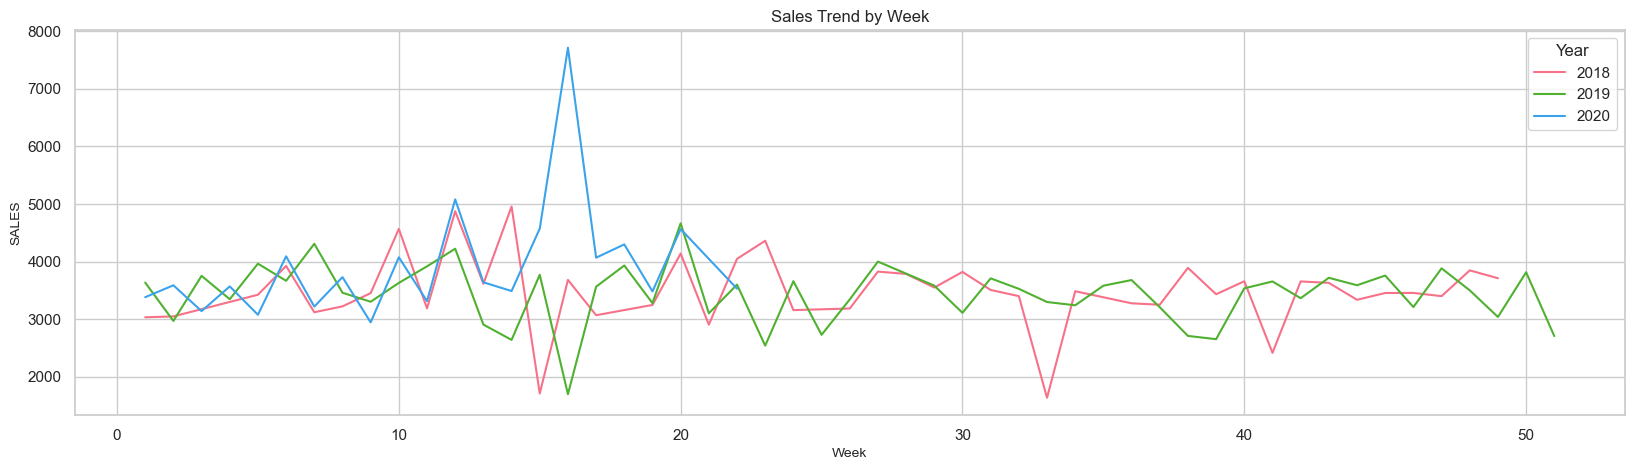

In [48]:
# Sales trend by Week
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')

plt.show()

### Multivariate Analysis

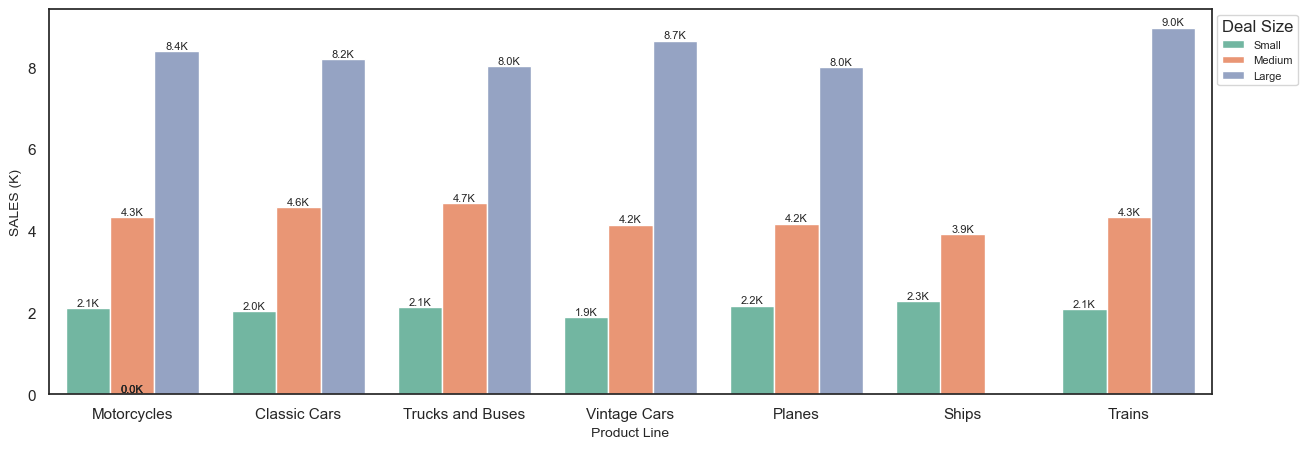

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


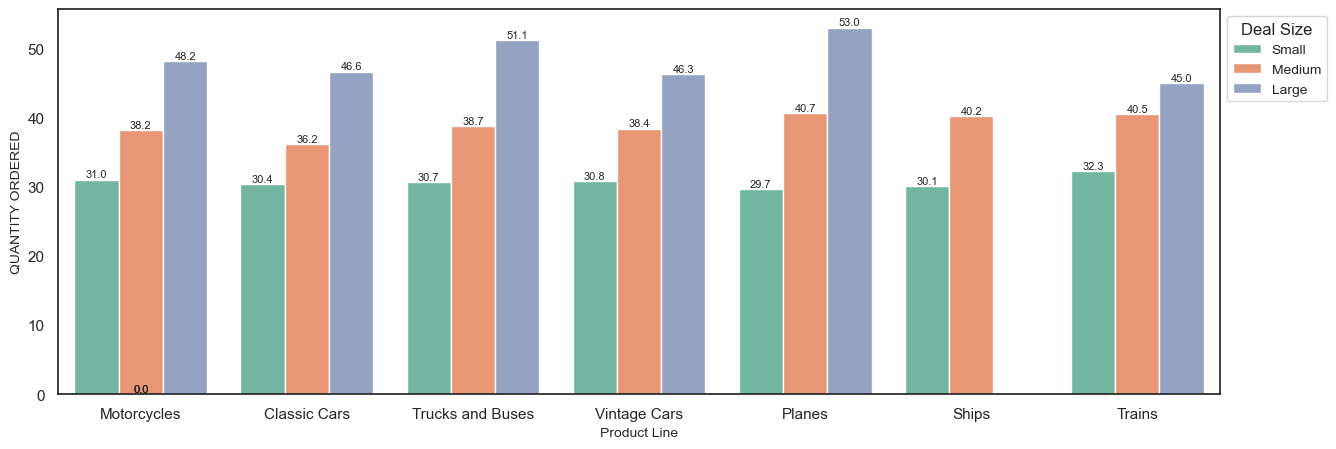

In [50]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


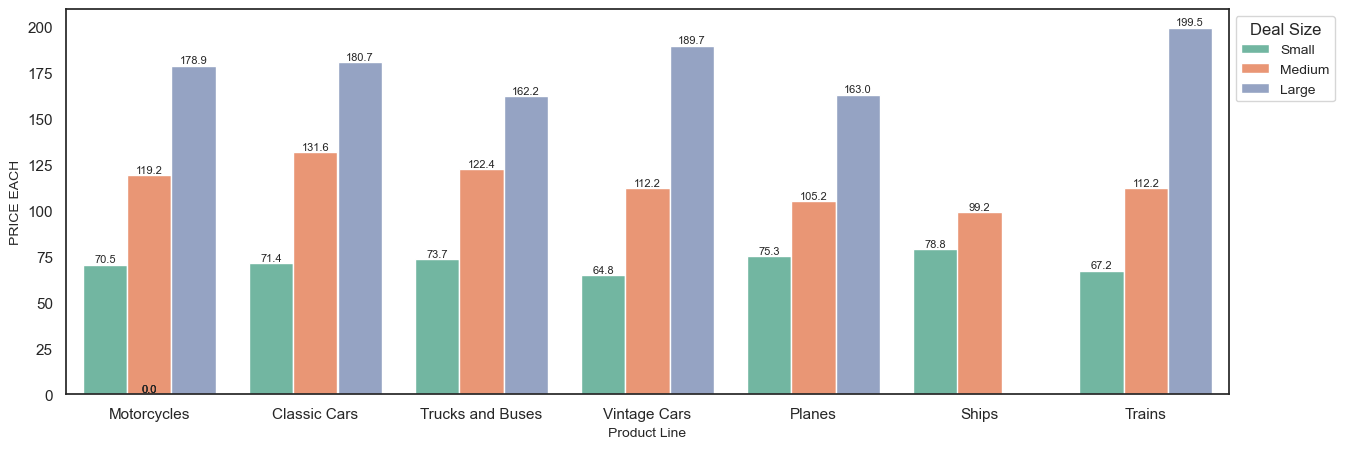

In [51]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


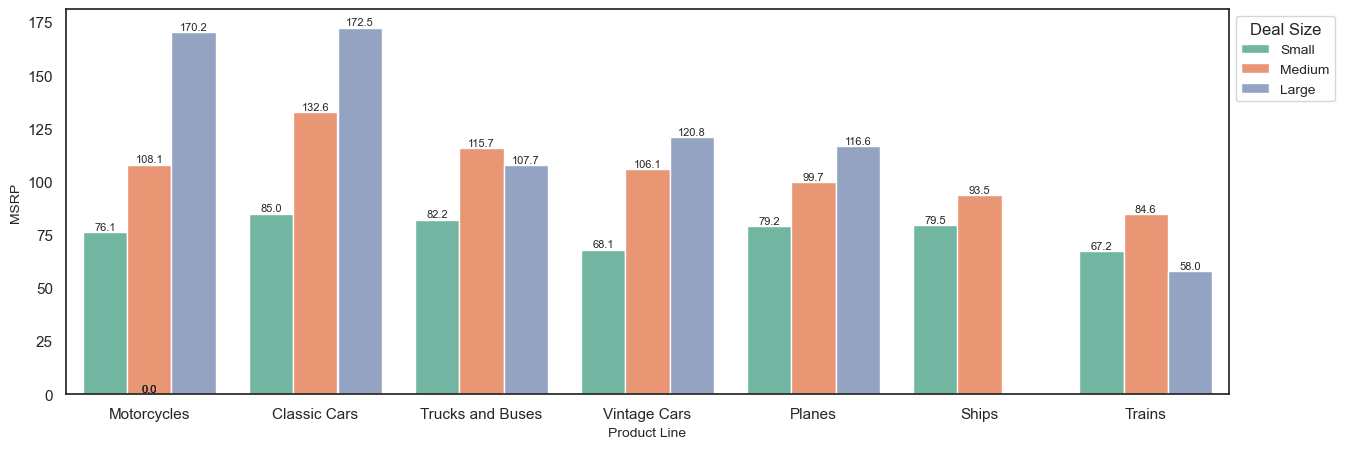

In [52]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


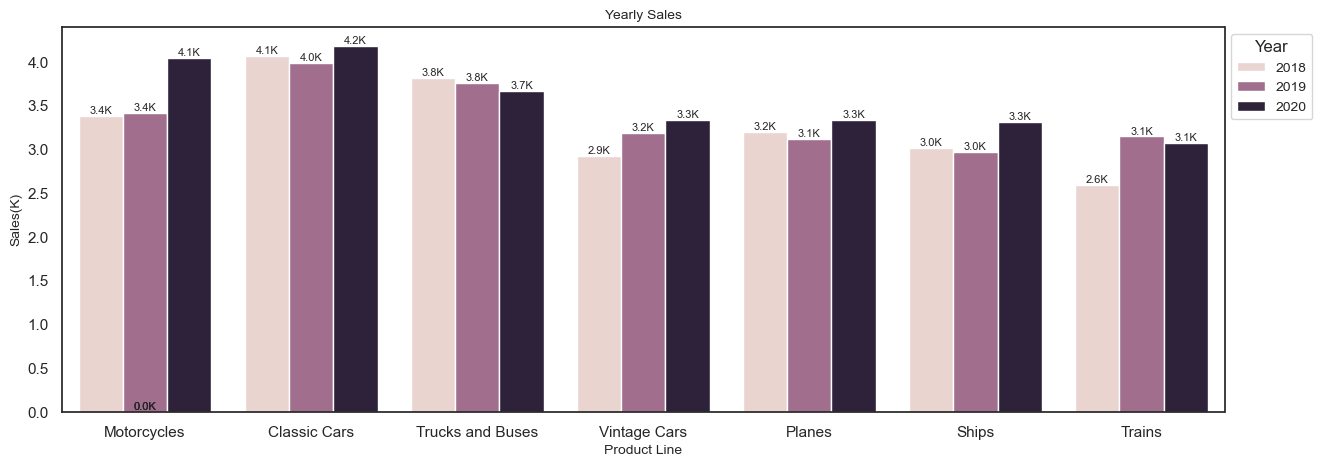

In [53]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

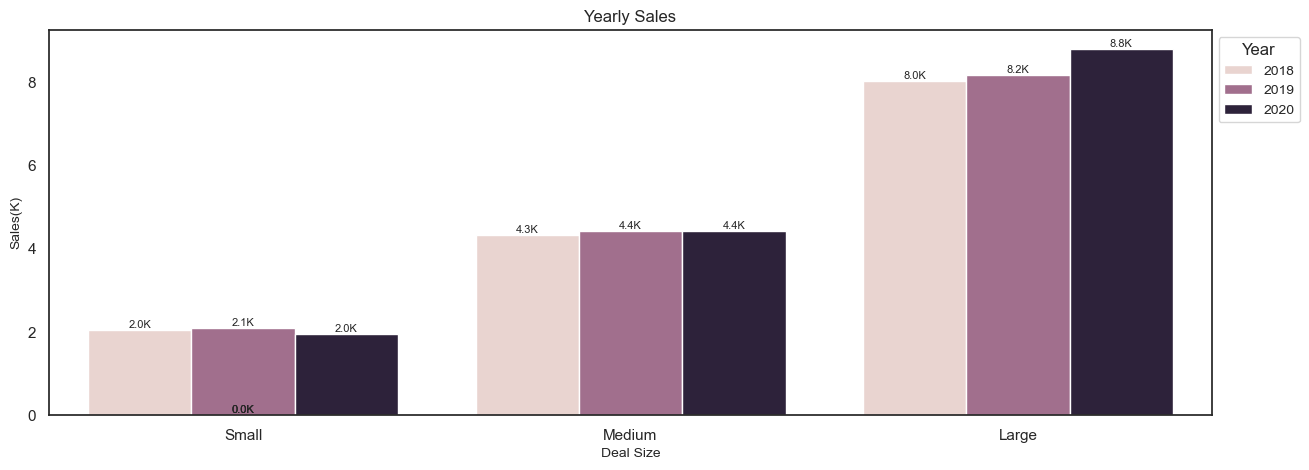

In [54]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

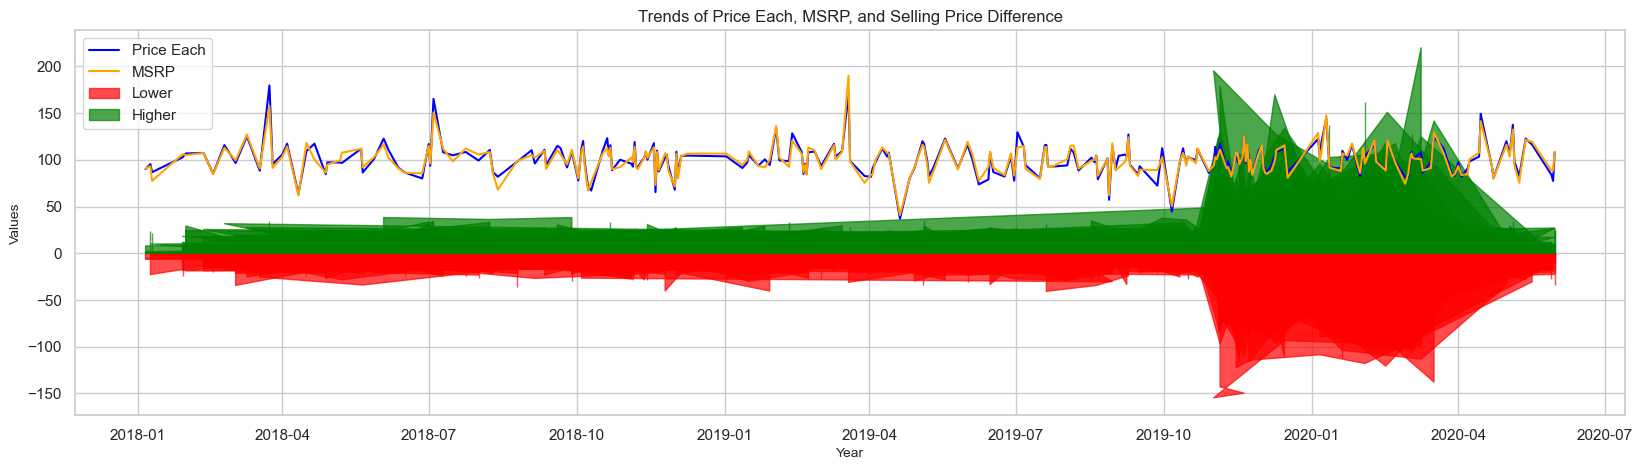

In [55]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

### Exporting the data

In [56]:
df.to_excel('Sales_data_processed.xlsx', index=False)
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  ... CONTACTLASTNAME  \
0 2018-02-24  Shipped  Motorcycles    95    S10_1678  ...              Yu   
1 2018-05-07  Shipped  Motorcycles    95    S10_1678  ...         Henriot   
2 2018-07-01  Shipped  Motorcycles    95    S10_1678  ...        Da Cunha   
3 2018-08-25  Shipped  Motorcycles    95    S10_1678  ...           Young   
4 2018-10-28  Shipped  Motorcycles    95    S10_1678  ...          Hirano   

  CONTACTFIRSTNAME DEALSIZE DAYS_SINCE_LASTORDER  Year Month Week Quarter  \
0             Kwai    Small                  828  2018     2    8       1   
1             Paul    Small                  756  2018     5   19       2   
2           Daniel   Medium                  701  2018     7   26       3   
3            Julie   Medium                  646  2018     8   34       3   
4             Juri   Medium                  582  2018    10   43       4   

  SALES (K)  SELLING_PRICE_DIFF  
0   2.87100                0.70  
1   2.76590              -13.65  
2   3.88434               -0.26  
3   3.74670              -11.74  
4   3.47976                1.66  

[5 rows x 26 columns]